In [1]:
import pandas as pd

In [2]:
iris_data=pd.read_csv('iris.data.csv')
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
iris_data=pd.read_csv('iris.data.csv', names=["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "class"])

In [4]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data=pd.read_csv('iris.data.csv', names=["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm", "class"], na_values=['NA'])

In [6]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

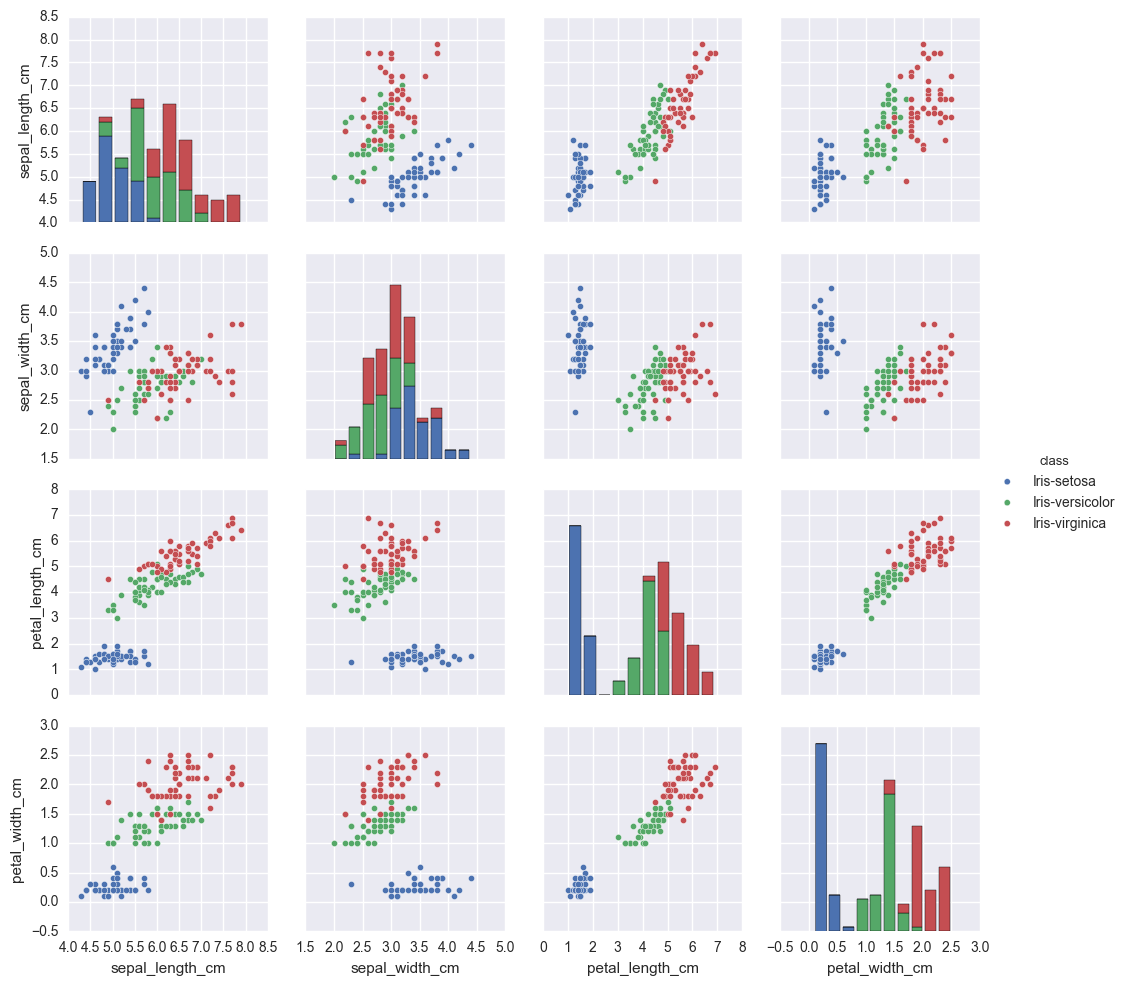

In [8]:
sb.pairplot(iris_data.dropna(), hue='class')

In [9]:
assert len(iris_data['class'].unique())==3

In [10]:
assert iris_data.loc[iris_data['class']=='Iris-versicolor', 'sepal_length_cm'].min()>=2.5

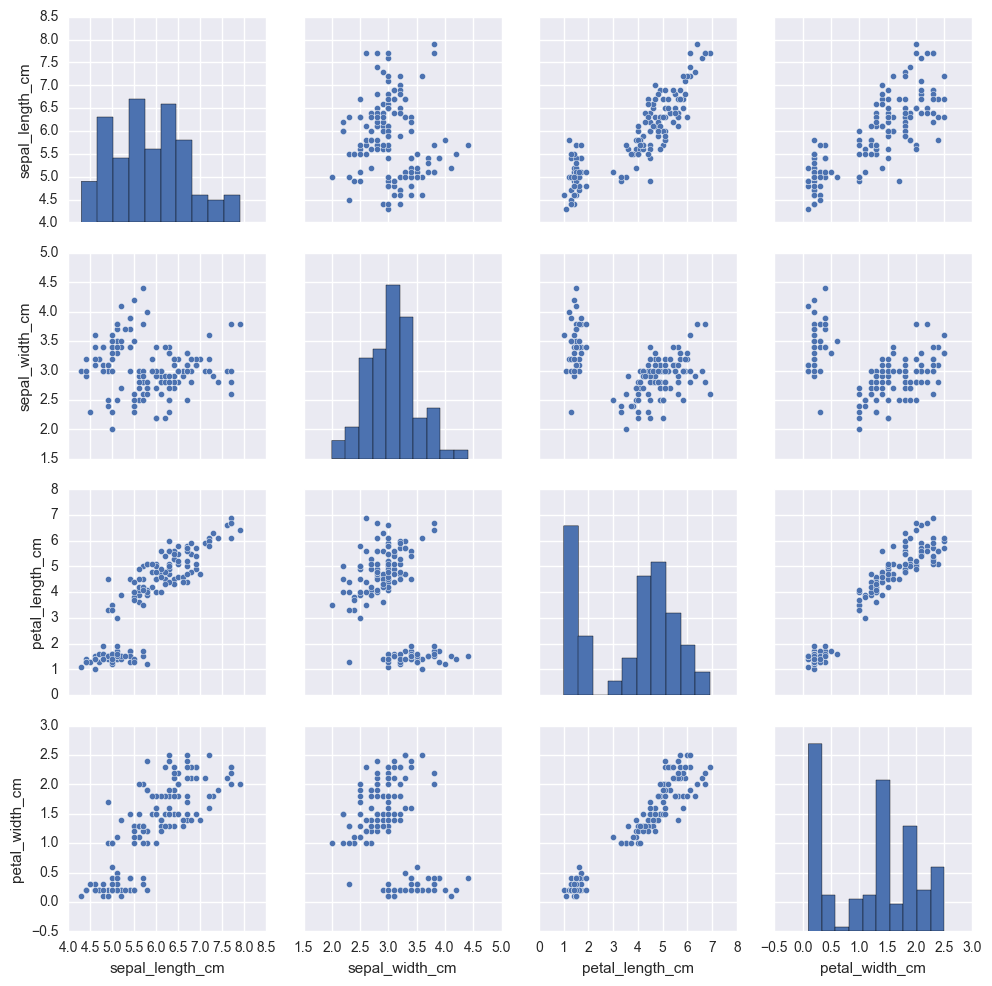

In [11]:
sb.pairplot(iris_data)

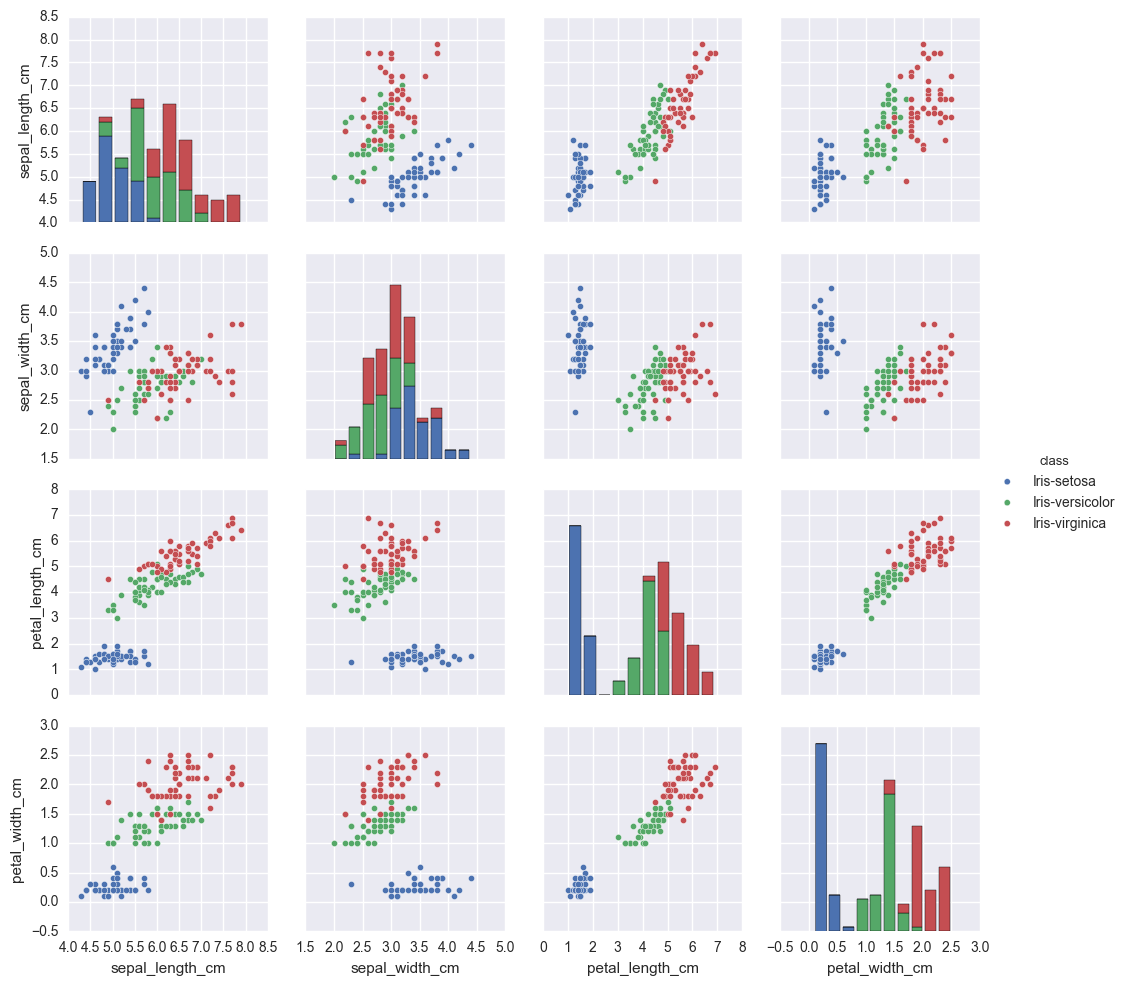

In [12]:
sb.pairplot(iris_data, hue='class')

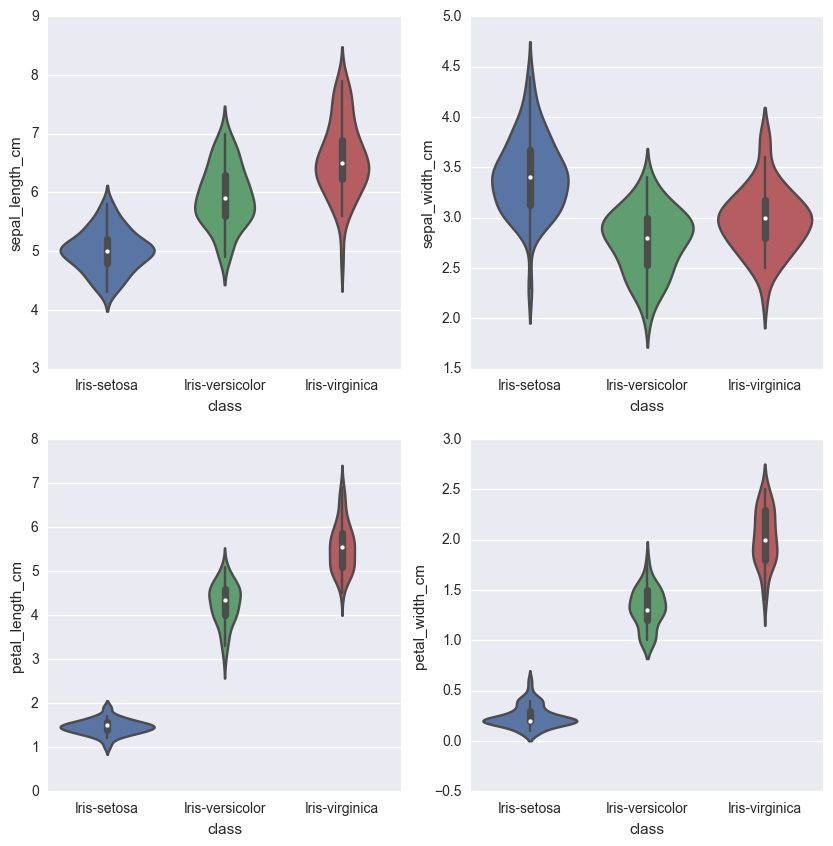

In [16]:
plt.figure(figsize=(10,10))
for column_index, column in enumerate(iris_data.columns):
    if column=='class':
        continue
    plt.subplot(2,2,column_index+1)
    sb.violinplot(x='class', y=column, data=iris_data)

In [17]:
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
all_classes= iris_data['class'].values
all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [18]:
from sklearn.cross_validation import train_test_split

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc=DecisionTreeClassifier()
dtc.fit(training_inputs, training_classes)
dtc.score(testing_inputs, testing_classes)

0.97368421052631582

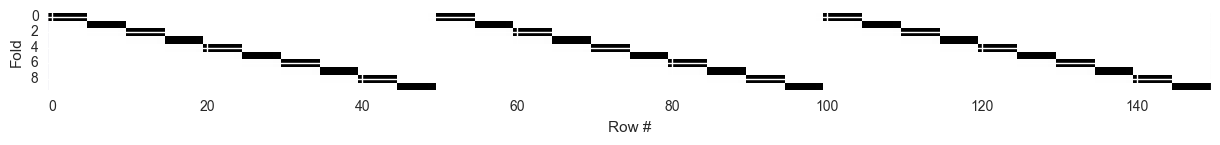

In [22]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

def plot_cv(cv, n_samples):
    masks=[]
    for train, test in cv:
        mask=np.zeros(n_samples, dtype=bool)
        mask[test]=1
        masks.append(mask)
    plt.figure(figsize=(15,15))
    plt.imshow(masks, interpolation='none')
    plt.ylabel('Fold')
    plt.xlabel('Row #')
    
plot_cv(StratifiedKFold(all_classes, n_folds=10), len(all_classes))

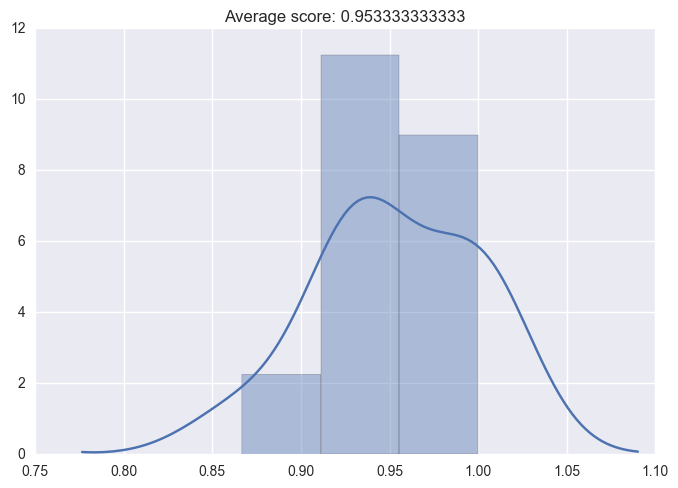

In [23]:
from sklearn.cross_validation import cross_val_score
dtc=DecisionTreeClassifier()
cv_scores = cross_val_score(dtc, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [24]:
from sklearn.grid_search import GridSearchCV
dtc=DecisionTreeClassifier()

parameter_grid = {'max_depth': [1,2,3,4,5],
                 'max_features': [1,2,3,4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)
grid_search = GridSearchCV(dtc, param_grid=parameter_grid,
                          cv=cross_validation)
grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/Applications/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best score: 0.973333333333
Best parameters: {'max_features': 2, 'max_depth': 5}


In [25]:
from sklearn.grid_search import GridSearchCV
dtc=DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'], 
                 'max_depth': [1,2,3,4,5],
                 'max_features': [1,2,3,4]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)
grid_search = GridSearchCV(dtc, param_grid=parameter_grid,
                          cv=cross_validation)
grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.96
Best parameters: {'max_features': 4, 'splitter': 'best', 'criterion': 'gini', 'max_depth': 3}


In [26]:
dtc=grid_search.best_estimator_
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

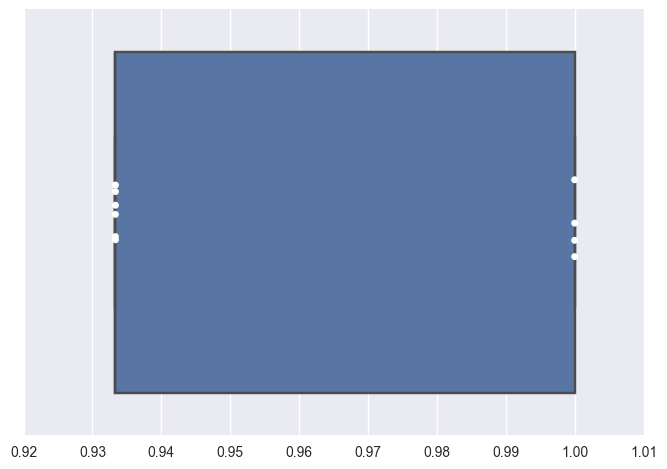

In [28]:
rf_scores = cross_val_score(dtc, all_inputs, all_classes, cv=10)

sb.boxplot(rf_scores)
sb.stripplot(rf_scores, jitter=True, color='white')

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

parameter_grid = {'n_estimators':[5,10,25,50],
                 'criterion': ['gini', 'entropy'],
                 'max_features':[1,2,3,4],
                 'warm_start':[True, False]}
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search= GridSearchCV(rfc, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score:{}'.format(grid_search.best_score_))
print('Best parameters:{}'.format(grid_search.best_params_))
grid_search.best_estimator_

Best score:0.966666666667
Best parameters:{'max_features': 2, 'n_estimators': 25, 'criterion': 'gini', 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)